# Connect to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import And Install library

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.9/757.9 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os
import shutil
import numpy as np

# Go to folder

In [4]:
%cd /content/drive/MyDrive/Image_Processing/

/content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing


In [5]:
%ls

datasets/  nom_v8_test.yaml  nom_v8.yaml  runs/  yolov8_fine_tuning.ipynb  yolov8n.pt


# Visualize Images from the Dataset

In [ ]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [ ]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [ ]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))

    all_images.sort()

    num_images = len(all_images)
    print("num_images: ", num_images)
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

num_images:  210


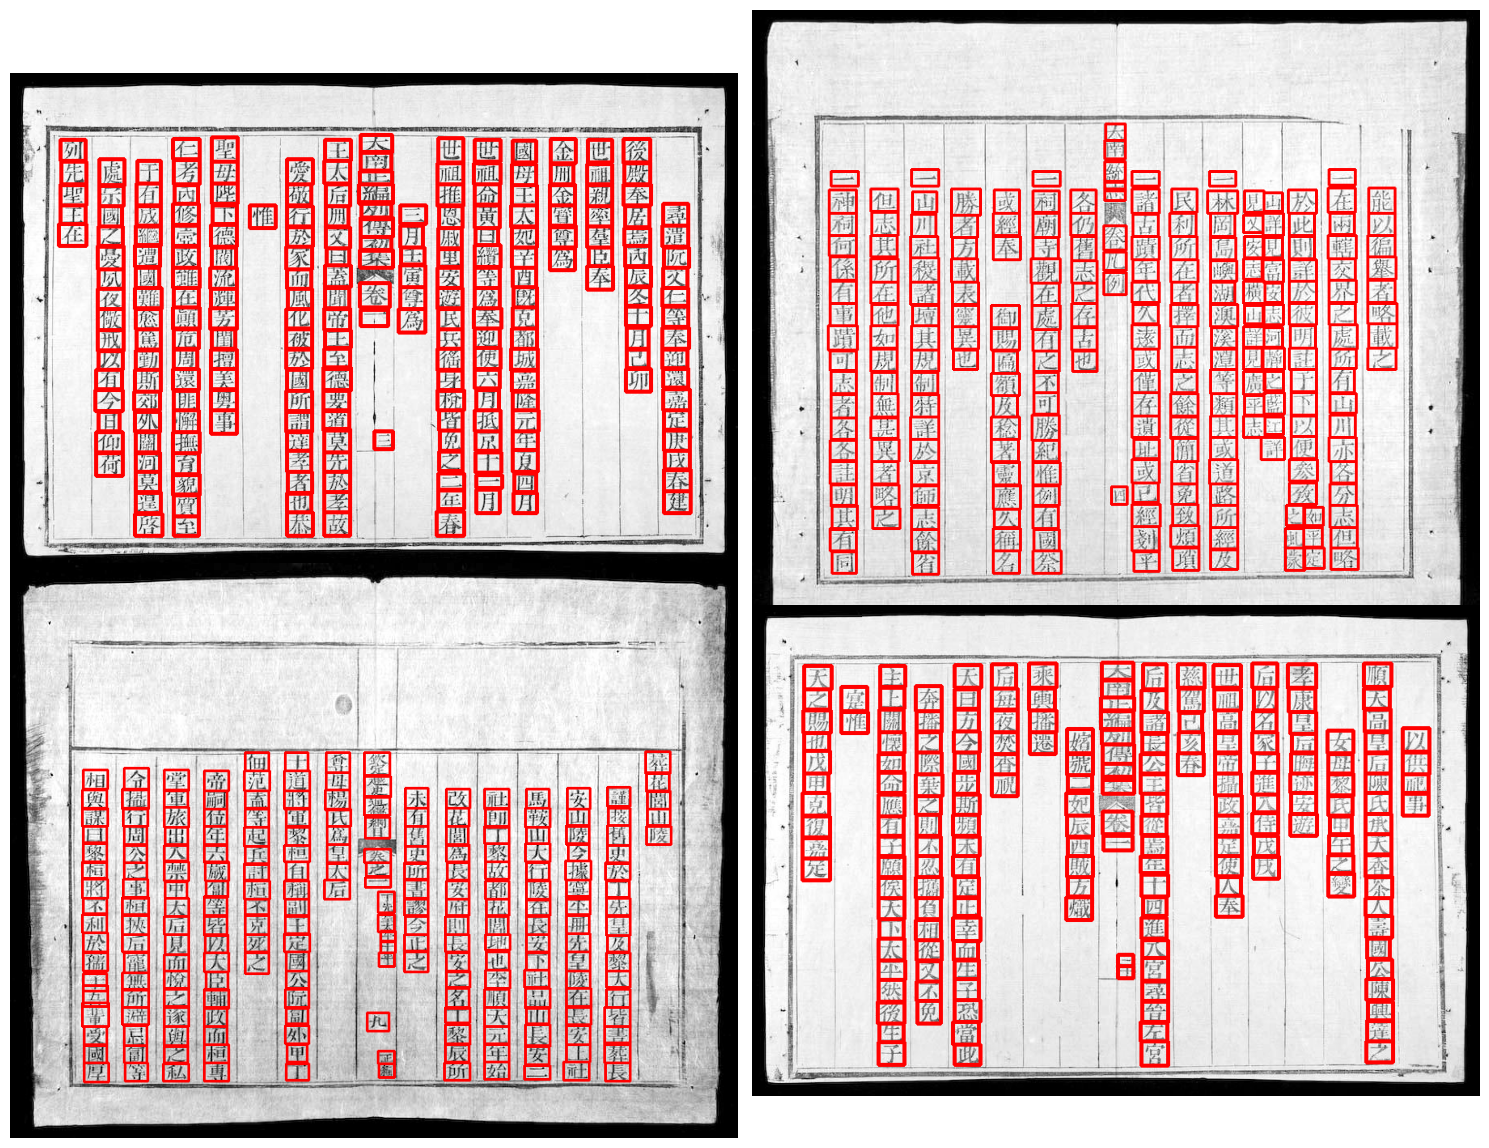

In [ ]:
# Visualize a few training images.

plot (
    image_paths='./datasets/augmented_data/train/images',
    label_paths='./datasets/augmented_data/train/labels',
    num_samples=4,
)

# Dataset YAML File

In [6]:
%%writefile nom_v8.yaml
path: './'
train: 'origin_thanh_data_aug/images/'
# val: 'data/images/val'
val: 'data/images/val'
# class names
names:
  0: 'nom'

Overwriting nom_v8.yaml


# YOLOv8 Nano Training

In [ ]:
# Sample training for 5 epoch.
EPOCHS = 100
!yolo task=detect mode=train model=yolov8n.pt imgsz=1280 data=./nom_v8.yaml epochs={EPOCHS} batch=6 name=hieu_yolov8n_thanh_data_aug

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./nom_v8.yaml, epochs=100, time=None, patience=100, batch=6, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=hieu_yolov8n_thanh_data_aug, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

# Evaluate model on Valid

In [ ]:
!yolo task=detect mode=val model=runs/detect/hieu_yolov8n_thanh_data_aug/weights/best.pt name=hieu_yolov8n_thanh_data_aug_eval data=nom_v8.yaml conf=0.5

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 42.7MB/s]
val: Scanning /content/drive/MyDrive/Image_Processing/datasets/data/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:10<00:00,  1.07s/it]
val: New cache created: /content/drive/MyDrive/Image_Processing/datasets/data/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:13<00:00, 13.44s/it]
                   all         10       1956      0.986      0.988      0.993      0.851
Speed: 22.1ms preprocess, 1127.1ms inference, 0.0ms loss, 140.8ms postprocess per image
Results saved to runs/detect/hieu_yolov8n_thanh_data_aug_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo task=detect \
mode = predict \
model = runs/detect/yolov8n_v8_50_augmented_data/weights/best.pt \
source = datasets/data/images/val \
imgsz = 1280 \
conf = 0.5 \
augment = True \
name = kien_yolov8n_best_infer \
show_labels = False \
save_txt = True \
save_conf = True

Ultralytics YOLOv8.2.19 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/10 /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/data/images/val/nlvnpf-0137-01-045.jpg: 896x1280 227 noms, 247.7ms
image 2/10 /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/data/images/val/nlvnpf-0137-01-046.jpg: 864x1280 241 noms, 133.5ms
image 3/10 /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/data/images/val/nlvnpf-0137-01-047.jpg: 864x1280 206 noms, 41.7ms
image 4/10 /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/data/images/val/nlvnpf-0137-01-048.jpg: 896x1280 187 noms, 40.9ms
image 5/10 /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/data/images/val/n

# Merge data

In [ ]:
import os
import shutil

def merge(dest, src, t="images"):
  dest_path = "./datasets/" + dest
  if not os.path.exists(dest_path):
    os.mkdir(dest_path)

  dest_path = dest_path + "/" + t
  if not os.path.exists(dest_path):
    os.mkdir(dest_path)

  for file in os.listdir(src):
    shutil.copyfile(os.path.join(src, file), os.path.join(dest_path, file))

In [ ]:
# image:
merge("origin_thanh", "./datasets/data/images/train")
merge("origin_thanh", "./datasets/thanhdata/pack3/img")

# label:
merge("origin_thanh", "./datasets/data/labels/train", t="labels")
merge("origin_thanh", "./datasets/thanhdata/pack3/label", t="labels")

# Data Preprocess and Augmentation


In [ ]:
def contrast_stretching(img):
  min_val = np.min(img)
  max_val = np.max(img)

  LUT = np.zeros(256, dtype = np.uint8)
  for i in range(256):
    LUT[i] = ((i - min_val) / (max_val - min_val)) * 255

  stretched_img = cv2.LUT(img, LUT)

  return stretched_img

In [ ]:
def add_gaussian_blur(input_folder, output_folder):
  for file in os.listdir(input_folder):
    if file.endswith(".jpg"):
      img = cv2.imread(os.path.join(input_folder, file))
      if img is not None:
        kernel_size = np.random.choice([1, 3, 5])
        blurred_img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
        cv2.imwrite(os.path.join(output_folder, file[0:(len(file) - 4)]+"_blurred.jpg"), blurred_img)

In [ ]:
def convert_images_to_grayscale(input_folder, output_folder):
  if not os.path.exists(output_folder):
    os.makedirs(output_folder)

  for file in os.listdir(input_folder):
    if file.endswith(".jpg"):
      img = cv2.imread(os.path.join(input_folder, file))
      if img is not None:
        grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        stretched_img = contrast_stretching(grayscale_img)
        cv2.imwrite(os.path.join(output_folder, file), stretched_img)

In [ ]:
def clone_labels(input_folder, output_folder, flag = False):
  if not os.path.exists(output_folder):
    os.makedirs(output_folder)

  for file in os.listdir(input_folder):
      if file.endswith(".txt"):
        src = os.path.join(input_folder, file)
        if flag == False:
          des = os.path.join(output_folder, file)
        else:
          des = os.path.join(output_folder, file[0:(len(file) - 4)]+"_blurred.txt")
        shutil.copyfile(src, des)

In [ ]:
input_train_images = "./datasets/origin_thanh/images"
output_train_images = "./datasets/origin_thanh_grayscale_stretched/images"

input_train_labels = "./datasets/origin_thanh/labels"
output_train_labels = "./datasets/origin_thanh_grayscale_stretched/labels"

# input_val_images = "./datasets/data/images/val"
# output_val_images = "./datasets/data/images/val_grayscale_stretched"

# input_val_labels = "./datasets/data/labels/val"
# output_val_labels = "./datasets/data/labels/val_grayscale_stretched"

convert_images_to_grayscale(input_train_images, output_train_images)
# add_gaussian_blur(input_train_images, input_train_images)
# clone_labels(input_train_labels, output_train_labels)

## Evaluation on Validation Images

In [ ]:
!yolo task=detect mode=val model=runs/detect/yolov8n_v8_50_augmented_data/weights/best.pt name=yolov8n_augmented_data_eval data=nom_v8.yaml conf=0.5

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 10.9MB/s]
val: Scanning /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/data/labels/val_grayscale_stretched... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<00:00, 76.89it/s]
val: New cache created: /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/data/labels/val_grayscale_stretched.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:13<00:00, 13.71s/it]
                   all         10       1956      0.993      0.995      0.995      0.901
Speed: 77.7ms preprocess, 966.7ms inference, 0.0ms loss, 239.0ms postprocess per image
Results saved to runs/detect/yolov8n_augmented_data_eval7
💡 Learn more at https://docs.ultralytics.com/modes

In [ ]:
!yolo task=detect mode=val model=runs/detect/yolov8n_v8_50_augmented_data_v22/weights/best.pt name=yolov8n_augmented_data_v2_eval data=nom_v8.yaml conf=0.5

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/data/labels/val_grayscale_stretched.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:05<00:00,  5.01s/it]
                   all         10       1956      0.994      0.995      0.995        0.9
Speed: 0.9ms preprocess, 29.7ms inference, 0.0ms loss, 213.9ms postprocess per image
Results saved to runs/detect/yolov8n_augmented_data_v2_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


# Convert test set to grayscale


In [ ]:
input_val_images = "./datasets/extra_data/test/images"
output_val_images = "./datasets/extra_data/test_grayscale_stretched/images"

input_val_labels = "./datasets/extra_data/test/labels"
output_val_labels = "./datasets/extra_data/test_grayscale_stretched/labels"

convert_images_to_grayscale(input_val_images, output_val_images)
clone_labels(input_val_labels, output_val_labels)

In [ ]:
%%writefile nom_v8_test.yaml
path: './'
train: 'augmented_data/train/images'
# val: 'data/images/val'
val: 'extra_data/test_grayscale_stretched/images'
# class names
names:
  0: 'nom'

Overwriting nom_v8_test.yaml


In [ ]:
!yolo task=detect mode=val model=runs/detect/yolov8n_v8_50_augmented_data/weights/best.pt name=yolov8n_augmented_data_eval data=nom_v8_test.yaml conf=0.5

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 15.1MB/s]
val: Scanning /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/extra_data/test_grayscale_stretched/labels... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:09<00:00,  2.13it/s]
val: New cache created: /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/extra_data/test_grayscale_stretched/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:10<00:00,  5.19s/it]
                   all         20       4307      0.994      0.961       0.98      0.886
Speed: 35.5ms preprocess, 26.3ms inference, 0.0ms loss, 215.4ms postprocess per image
Results saved to runs/detect/yolov8n_augmented_data_eval8
💡 Learn more at https://docs.ultra

In [ ]:
!yolo task=detect mode=val model=runs/detect/yolov8n_v8_50_augmented_data_v22/weights/best.pt name=yolov8n_augmented_data_v2_eval data=nom_v8_test.yaml conf=0.5

Ultralytics YOLOv8.2.17 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/extra_data/test_grayscale_stretched/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:21<00:00, 10.93s/it]
                   all         20       4307      0.996       0.96       0.98      0.883
Speed: 18.1ms preprocess, 24.2ms inference, 0.0ms loss, 116.6ms postprocess per image
Results saved to runs/detect/yolov8n_augmented_data_v2_eval2
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference on Test Images

In [ ]:
!yolo task=detect \
mode = predict \
model = runs/detect/yolov8n_v8_50_augmented_data/weights/best.pt \
source = datasets/extra_data/test_grayscale_stretched/images \
imgsz = 1280 \
conf = 0.5 \
augment = True \
name = yolov8n_v8_50e_infer1280_augmented_data_test_grayscale_stretched \
show_labels = False \
save_txt = True \
save_conf = True

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/20 /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/extra_data/test_grayscale_stretched/images/nlvnpf-0137-01-051_jpg.rf.bbf33e54841643c9bee3e4fb1dde2483.jpg: 896x1280 187 noms, 271.5ms
image 2/20 /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/extra_data/test_grayscale_stretched/images/nlvnpf-0137-01-052_jpg.rf.87a6e9d129ac8780bf36e90d9b85cc24.jpg: 864x1280 176 noms, 222.8ms
image 3/20 /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/datasets/extra_data/test_grayscale_stretched/images/nlvnpf-0137-01-053_jpg.rf.c8cf9422b43d21842db7e1a9a05cfee4.jpg: 896x1280 168 noms, 49.3ms
image 4/20 /content/drive/.shortcut-targets-by-id/1ZVjMWcC8gs-MeyddX8qO6LsbBX8qPRfx/Image_Processing/d

## Visualize Test Results

In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

In [ ]:
visualize('runs/detect/yolov8n_v8_50e_infer1280/')

In [ ]:
!pwd

/content/drive/MyDrive/Image_Processing
